In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_log_error as msle
import joblib
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings('ignore')

# pandasの表示を設定するよ
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:, 4f}'.format)

In [45]:
train = pd.read_csv('train.csv', encoding='utf-8')
test = pd.read_csv('test.csv', encoding='utf-8')


def format_date_time(df):

    df['date_time'] = pd.to_datetime(df['date_time'], format='%Y-%m-%d %H:%M:%S')

    return df


train = format_date_time(train)
test = format_date_time(test)

### SARIMAXもやってみる
##### 説明変数にはLightGBMのSHAP分析で寄与度が大きかったSensor2の値を用いる

In [46]:
targets = ['target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides']
target_names = ['CO', 'C6H6', 'NOx']
colors = ['teal', 'palevioletred', 'coral']

##### Train Test Split

In [47]:
df_CO = train[['date_time', targets[0]]].set_index('date_time', inplace=False)

df_C6H6 = train[['date_time', targets[1]]].set_index('date_time', inplace=False)

df_NOx = train[['date_time', targets[2]]].set_index('date_time', inplace=False)

df_x = train[['date_time', 'sensor_2']].set_index('date_time', inplace=False)

train_CO, val_CO = train_test_split(df_CO, test_size=0.1, shuffle=False)
train_C6H6, val_C6H6 = train_test_split(df_C6H6, test_size=0.1, shuffle=False)
train_NOx, val_NOx = train_test_split(df_NOx, test_size=0.1, shuffle=False)
train_x, val_x = train_test_split(df_x, test_size=0.1, shuffle=False)

##### パラメーター探索

In [48]:
# 毎時データなので周期は1日/24時間で24
max_p = 2
max_d = 2
max_q = 2
max_sp = 1
max_sd = 1
max_sq = 1
s = 24
params = []

for p in range(0, max_p + 1):
    for d in range(0, max_d + 1):
        for q in range(0, max_q + 1):
            for sp in range(0, max_sp + 1):
                for sd in range(0, max_sd + 1):
                    for sq in range(0, max_sq + 1):
                        params.append([p, d, q, sp, sd, sq, s])

# 216通りのパラメーターセットができる

In [49]:
def bic_calc_CO(param):
    
    bic = SARIMAX(
        endog=train_CO, exog=train_x,
        order=(param[0], param[1], param[2]), 
        seasonal_order=(param[3], param[4], param[5], param[6]),
        enforce_stationarity = True, enforce_invertibility = True,
        initialization='approximate_diffuse').fit(disp=False).bic

    return bic


def bic_calc_C6H6(param):
    
    bic = SARIMAX(
        endog=train_C6H6, exog=train_x,
        order=(param[0], param[1], param[2]), 
        seasonal_order=(param[3], param[4], param[5], param[6]),
        enforce_stationarity = True, enforce_invertibility = True,
        initialization='approximate_diffuse').fit(disp=False).bic

    return bic


def bic_calc_NOx(param):
    
    bic = SARIMAX(
        endog=train_NOx, exog=train_x,
        order=(param[0], param[1], param[2]), 
        seasonal_order=(param[3], param[4], param[5], param[6]),
        enforce_stationarity = True, enforce_invertibility = True,
        initialization='approximate_diffuse').fit(disp=False).bic

    return bic

In [50]:
bic_list_CO = joblib.Parallel(n_jobs=-1, verbose=0)(joblib.delayed(bic_calc_CO)(param) for param in tqdm(params))

  0%|          | 0/216 [00:00<?, ?it/s]

/Users/makoto/homebrew/Caskroom/miniforge/base/envs/jpt/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/makoto/homebrew/Caskroom/miniforge/base/envs/jpt/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/makoto/homebrew/Caskroom/miniforge/base/envs/jpt/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/makoto/homebrew/Caskroom/miniforge/base/envs/jpt/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/makoto/ho

In [53]:
bic_list_C6H6 = joblib.Parallel(n_jobs=-1, verbose=0)(joblib.delayed(bic_calc_C6H6)(param) for param in tqdm(params))

  0%|          | 0/216 [00:00<?, ?it/s]

/Users/makoto/homebrew/Caskroom/miniforge/base/envs/jpt/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/makoto/homebrew/Caskroom/miniforge/base/envs/jpt/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/makoto/homebrew/Caskroom/miniforge/base/envs/jpt/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/makoto/homebrew/Caskroom/miniforge/base/envs/jpt/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/makoto/ho

In [52]:
bic_list_NOx = joblib.Parallel(n_jobs=-1, verbose=0)(joblib.delayed(bic_calc_NOx)(param) for param in tqdm(params))

  0%|          | 0/216 [00:00<?, ?it/s]

/Users/makoto/homebrew/Caskroom/miniforge/base/envs/jpt/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/makoto/homebrew/Caskroom/miniforge/base/envs/jpt/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/makoto/homebrew/Caskroom/miniforge/base/envs/jpt/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/makoto/homebrew/Caskroom/miniforge/base/envs/jpt/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/makoto/ho

In [55]:
# パラメータ探索の結果をデータフレームに保存
bic_df_CO = pd.DataFrame({'params': params, 'bic': bic_list_CO})
bic_df_CO = bic_df_CO.sort_values('bic')

bic_df_C6H6 = pd.DataFrame({'params': params, 'bic': bic_list_C6H6})
bic_df_C6H6 = bic_df_C6H6.sort_values('bic')

bic_df_NOx = pd.DataFrame({'params': params, 'bic': bic_list_NOx})
bic_df_NOx = bic_df_NOx.sort_values('bic')

In [56]:
best_param_CO = bic_df_CO.iloc[0, 0]
best_param_C6H6 = bic_df_C6H6.iloc[0, 0]
best_param_NOx = bic_df_NOx.iloc[0, 0]

##### BICが最小になるパラメータでモデルを作る

In [59]:
model_sarimax_CO = SARIMAX(
                        endog=train_CO, exog=train_x,
                        order=(best_param_CO[0], best_param_CO[1], best_param_CO[2]), 
                        seasonal_order=(best_param_CO[3], best_param_CO[4], best_param_CO[5], best_param_CO[6]),
                        enforce_stationarity = True, enforce_invertibility = True,
                        initialization='approximate_diffuse')

result_CO = model_sarimax_CO.fit()


model_sarimax_C6H6 = SARIMAX(
                        endog=train_C6H6, exog=train_x,
                        order=(best_param_C6H6[0], best_param_C6H6[1], best_param_C6H6[2]), 
                        seasonal_order=(best_param_C6H6[3], best_param_C6H6[4], best_param_C6H6[5], best_param_C6H6[6]),
                        enforce_stationarity = True, enforce_invertibility = True,
                        initialization='approximate_diffuse')

result_C6H6 = model_sarimax_C6H6.fit()


model_sarimax_NOx = SARIMAX(
                        endog=train_NOx, exog=train_x,
                        order=(best_param_NOx[0], best_param_NOx[1], best_param_NOx[2]), 
                        seasonal_order=(best_param_NOx[3], best_param_NOx[4], best_param_NOx[5], best_param_NOx[6]),
                        enforce_stationarity = True, enforce_invertibility = True,
                        initialization='approximate_diffuse')

result_NOx = model_sarimax_NOx.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.96157D-01    |proj g|=  2.42194D+00


 This problem is unconstrained.



At iterate    5    f=  6.93276D-01    |proj g|=  1.47907D+01

At iterate   10    f=  6.58801D-01    |proj g|=  1.24550D-01

At iterate   15    f=  6.54375D-01    |proj g|=  1.53393D+00

At iterate   20    f=  6.08237D-01    |proj g|=  1.02129D+01

At iterate   25    f=  6.07288D-01    |proj g|=  1.24587D+00

At iterate   30    f=  5.94184D-01    |proj g|=  1.22228D+01

At iterate   35    f=  5.89950D-01    |proj g|=  3.34419D-02

At iterate   40    f=  5.89607D-01    |proj g|=  4.16113D-01

At iterate   45    f=  5.88672D-01    |proj g|=  5.72487D-02

At iterate   50    f=  5.88665D-01    |proj g|=  3.71610D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  2.01857D+00    |proj g|=  3.07737D-01

At iterate   10    f=  2.00163D+00    |proj g|=  7.54828D-01

At iterate   15    f=  1.99965D+00    |proj g|=  1.72041D+00

At iterate   20    f=  1.98047D+00    |proj g|=  7.17253D-01

At iterate   25    f=  1.97693D+00    |proj g|=  1.05479D-01

At iterate   30    f=  1.97597D+00    |proj g|=  2.17836D-01

At iterate   35    f=  1.97594D+00    |proj g|=  5.35964D-03

At iterate   40    f=  1.97586D+00    |proj g|=  3.67166D-01

At iterate   45    f=  1.97564D+00    |proj g|=  6.63408D-01

At iterate   50    f=  1.97424D+00    |proj g|=  1.64231D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.46650D+00    |proj g|=  4.26187D-01

At iterate    5    f=  5.41535D+00    |proj g|=  2.12539D-02

At iterate   10    f=  5.39139D+00    |proj g|=  1.74458D-02

At iterate   15    f=  5.38192D+00    |proj g|=  1.42534D-02

At iterate   20    f=  5.36499D+00    |proj g|=  2.24559D-02

At iterate   25    f=  5.36159D+00    |proj g|=  1.08234D-03

At iterate   30    f=  5.36157D+00    |proj g|=  1.75667D-03

At iterate   35    f=  5.36118D+00    |proj g|=  1.02230D-02

At iterate   40    f=  5.36022D+00    |proj g|=  7.18329D-04

At iterate   45    f=  5.36015D+00    |proj g|=  6.50280D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

                                      SARIMAX Results                                       
Dep. Variable:               target_carbon_monoxide   No. Observations:                 6399
Model:             SARIMAX(1, 0, 2)x(0, 1, [1], 24)   Log Likelihood               -3766.865
Date:                              Thu, 07 Dec 2023   AIC                           7545.731
Time:                                      17:41:44   BIC                           7586.314
Sample:                                  03-10-2010   HQIC                          7559.778
                                       - 12-02-2010                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sensor_2       0.0040    2.1e-05    191.300      0.000       0.004       0.004
ar.L1          0.84

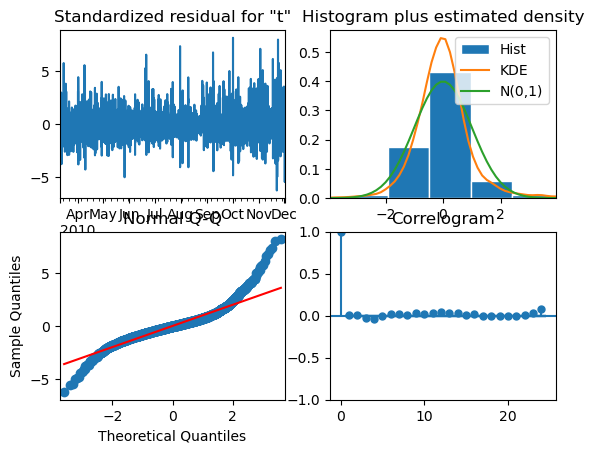

In [60]:
# SARIMAのときよりresidualが正規分布に近づいてる。AIC、BICも少し下がってる。
result_CO.plot_diagnostics(lags=24)
print(result_CO.summary())

                                     SARIMAX Results                                      
Dep. Variable:                     target_benzene   No. Observations:                 6399
Model:             SARIMAX(2, 0, 1)x(0, 1, 1, 24)   Log Likelihood              -12633.163
Date:                            Thu, 07 Dec 2023   AIC                          25278.326
Time:                                    17:41:52   BIC                          25318.909
Sample:                                03-10-2010   HQIC                         25292.374
                                     - 12-02-2010                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sensor_2       0.0259      0.000    231.605      0.000       0.026       0.026
ar.L1          1.1416      0.037   

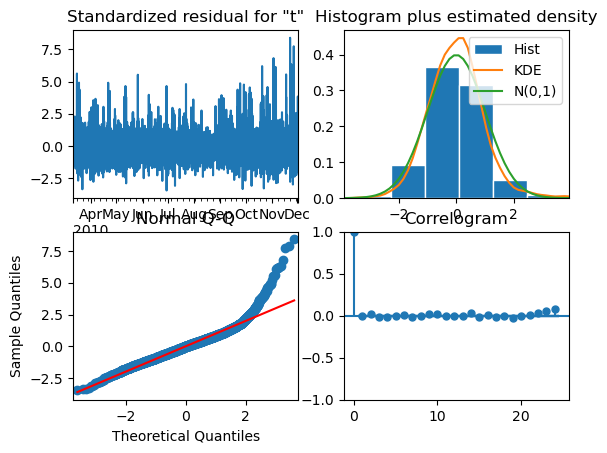

In [61]:
result_C6H6.plot_diagnostics(lags=24)
print(result_C6H6.summary())

                                      SARIMAX Results                                       
Dep. Variable:               target_nitrogen_oxides   No. Observations:                 6399
Model:             SARIMAX(2, 0, 2)x(1, 0, [1], 24)   Log Likelihood              -34299.594
Date:                              Thu, 07 Dec 2023   AIC                          68615.189
Time:                                      17:41:58   BIC                          68669.300
Sample:                                  03-10-2010   HQIC                         68633.919
                                       - 12-02-2010                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sensor_2       0.3252      0.003    112.375      0.000       0.320       0.331
ar.L1          1.74

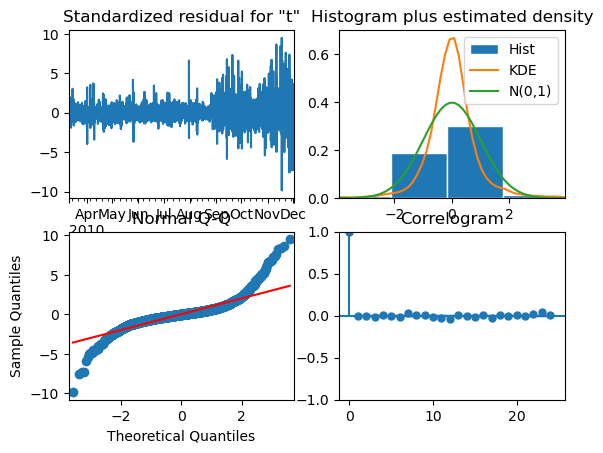

In [62]:
result_NOx.plot_diagnostics(lags=24)
print(result_NOx.summary())

##### 予測

In [63]:
pred_CO = result_CO.get_prediction(start=pd.to_datetime('2010-12-02 09:00:00'),
                                   end=pd.to_datetime('2011-01-01 00:00:00'),
                                   exog=val_x, dynamic=True)

pred_C6H6 = result_C6H6.get_prediction(start=pd.to_datetime('2010-12-02 09:00:00'),
                                       end=pd.to_datetime('2011-01-01 00:00:00'),
                                       exog=val_x, dynamic=True)

pred_NOx = result_NOx.get_prediction(start=pd.to_datetime('2010-12-02 09:00:00'),
                                     end=pd.to_datetime('2011-01-01 00:00:00'),
                                     exog=val_x, dynamic=True)

pred_mean_CO = pred_CO.predicted_mean
pred_mean_CO_values = pred_mean_CO.values.clip(min=0)
pred_ci_CO = pred_CO.conf_int()

pred_mean_C6H6 = pred_C6H6.predicted_mean
pred_mean_C6H6_values = pred_mean_C6H6.values.clip(min=0)
pred_ci_C6H6 = pred_C6H6.conf_int()

pred_mean_NOx = pred_NOx.predicted_mean
pred_mean_NOx_values = pred_mean_NOx.values.clip(min=0)
pred_ci_NOx = pred_NOx.conf_int()

##### 無印SARIMAよりはだいぶいい予想ができてそう

In [67]:
def rmsle(y_true, y_pred):
    
    eval_msle = msle(y_true, y_pred)

    return np.sqrt(eval_msle)

rmsle_CO = rmsle(val_CO.values ,pred_mean_CO_values)
rmsle_C6H6 = rmsle(val_C6H6.values ,pred_mean_C6H6_values)
rmsle_NOx = rmsle(val_NOx.values ,pred_mean_NOx.values)

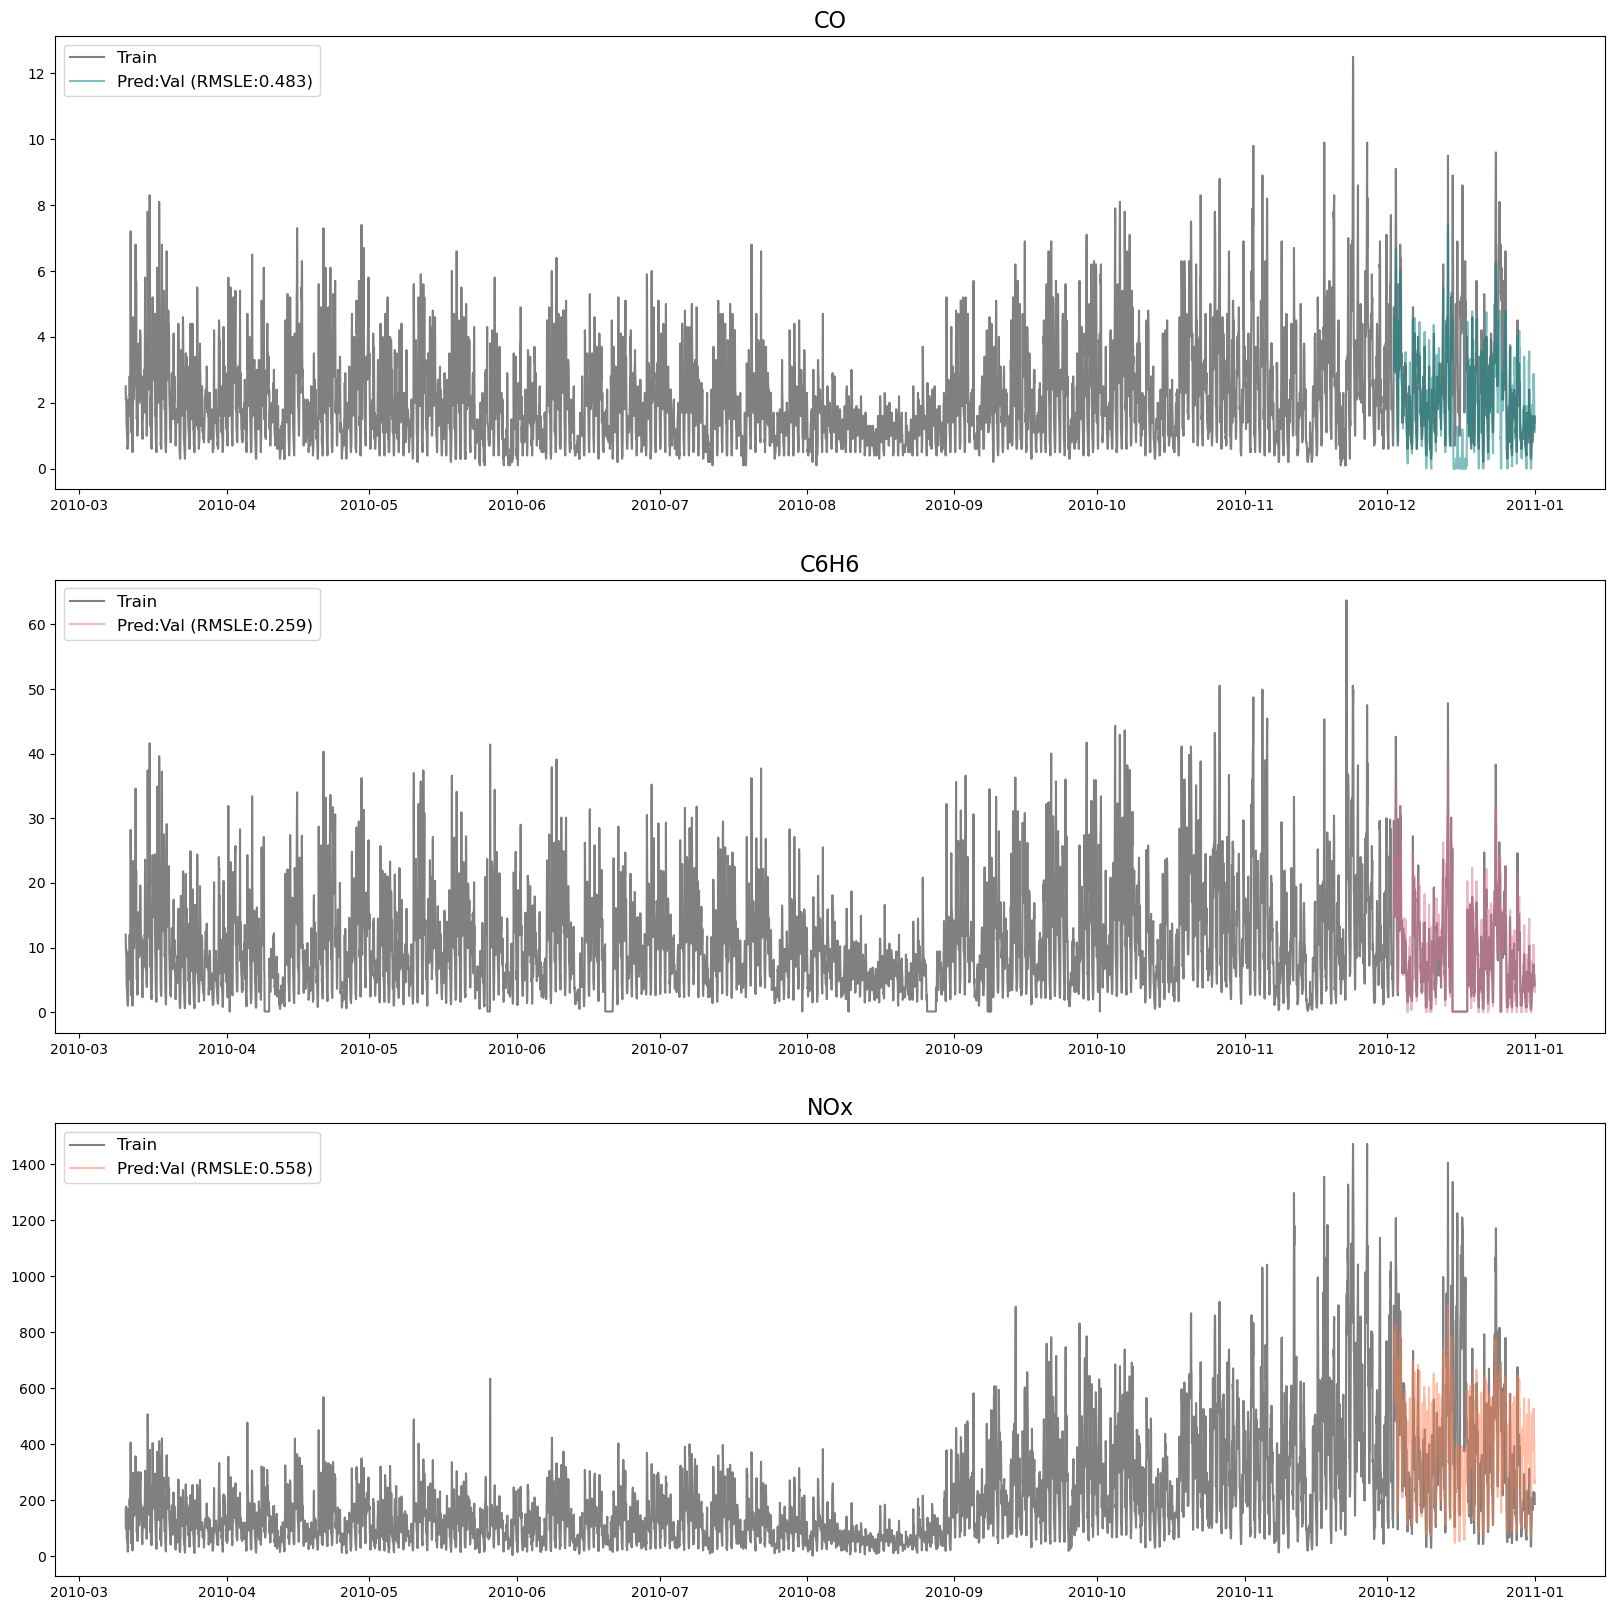

In [68]:
fig, axs = plt.subplots(figsize=(20, 20), ncols=1, nrows=3)

for i in range(3):

    name1 = f'df_{target_names[i]}'
    name2 = f'pred_mean_{target_names[i]}_values'
    name3 = f'rmsle_{target_names[i]}'

    axs[i].plot(df_CO.index, globals()[name1].values, color='gray', label='Train')
    axs[i].plot(pred_mean_CO.index, globals()[name2], color=colors[i], alpha=0.5, label=f'Pred:Val (RMSLE:{globals()[name3]:0.3f})')
    axs[i].set_title(target_names[i], fontsize=16)
    axs[i].legend(loc='upper left', fontsize=12)

plt.show()

##### トレインデータ全部を学習させ、テストデータを予測する

##### 改めてパラメータ探索

In [69]:
def bic_calc_2_CO(param):
    
    bic = SARIMAX(
        endog=df_CO, exog=df_x,
        order=(param[0], param[1], param[2]), 
        seasonal_order=(param[3], param[4], param[5], param[6]),
        enforce_stationarity = True, enforce_invertibility = True,
        initialization='approximate_diffuse').fit(disp=False).bic

    return bic


def bic_calc_2_C6H6(param):
    
    bic = SARIMAX(
        endog=df_C6H6, exog=df_x,
        order=(param[0], param[1], param[2]), 
        seasonal_order=(param[3], param[4], param[5], param[6]),
        enforce_stationarity = True, enforce_invertibility = True,
        initialization='approximate_diffuse').fit(disp=False).bic

    return bic


def bic_calc_2_NOx(param):
    
    bic = SARIMAX(
        endog=df_NOx, exog=df_x,
        order=(param[0], param[1], param[2]), 
        seasonal_order=(param[3], param[4], param[5], param[6]),
        enforce_stationarity = True, enforce_invertibility = True,
        initialization='approximate_diffuse').fit(disp=False).bic

    return bic

In [70]:
bic_list_2_CO = joblib.Parallel(n_jobs=-1, verbose=0)(joblib.delayed(bic_calc_2_CO)(param) for param in tqdm(params))

  0%|          | 0/216 [00:00<?, ?it/s]

/Users/makoto/homebrew/Caskroom/miniforge/base/envs/jpt/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/makoto/homebrew/Caskroom/miniforge/base/envs/jpt/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/makoto/homebrew/Caskroom/miniforge/base/envs/jpt/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/makoto/homebrew/Caskroom/miniforge/base/envs/jpt/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/makoto/ho

In [71]:
bic_list_2_C6H6 = joblib.Parallel(n_jobs=-1, verbose=0)(joblib.delayed(bic_calc_2_C6H6)(param) for param in tqdm(params))

  0%|          | 0/216 [00:00<?, ?it/s]

/Users/makoto/homebrew/Caskroom/miniforge/base/envs/jpt/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/makoto/homebrew/Caskroom/miniforge/base/envs/jpt/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/makoto/homebrew/Caskroom/miniforge/base/envs/jpt/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/makoto/homebrew/Caskroom/miniforge/base/envs/jpt/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/makoto/ho

In [73]:
bic_list_2_NOx = joblib.Parallel(n_jobs=-1, verbose=0)(joblib.delayed(bic_calc_2_NOx)(param) for param in tqdm(params))

  0%|          | 0/216 [00:00<?, ?it/s]

/Users/makoto/homebrew/Caskroom/miniforge/base/envs/jpt/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/makoto/homebrew/Caskroom/miniforge/base/envs/jpt/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/makoto/homebrew/Caskroom/miniforge/base/envs/jpt/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/makoto/homebrew/Caskroom/miniforge/base/envs/jpt/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/makoto/ho

In [74]:
bic_df_2_CO = pd.DataFrame({'params': params, 'bic': bic_list_2_CO})
bic_df_2_CO = bic_df_2_CO.sort_values('bic')

bic_df_2_C6H6 = pd.DataFrame({'params': params, 'bic': bic_list_2_C6H6})
bic_df_2_C6H6 = bic_df_2_C6H6.sort_values('bic')

bic_df_2_NOx = pd.DataFrame({'params': params, 'bic': bic_list_2_NOx})
bic_df_2_NOx = bic_df_2_NOx.sort_values('bic')

In [75]:
best_param_2_CO = bic_df_2_CO.iloc[0, 0]
best_param_2_C6H6 = bic_df_2_C6H6.iloc[0, 0]
best_param_2_NOx = bic_df_2_NOx.iloc[0, 0]

In [76]:
model_sarimax_2_CO = SARIMAX(
                        endog=df_CO, exog=df_x,
                        order=(best_param_2_CO[0], best_param_2_CO[1], best_param_2_CO[2]), 
                        seasonal_order=(best_param_2_CO[3], best_param_2_CO[4], best_param_2_CO[5], best_param_2_CO[6]),
                        enforce_stationarity = True, enforce_invertibility = True,
                        initialization='approximate_diffuse')

result_2_CO = model_sarimax_2_CO.fit()


model_sarimax_2_C6H6 = SARIMAX(
                        endog=df_C6H6, exog=df_x,
                        order=(best_param_2_C6H6[0], best_param_2_C6H6[1], best_param_2_C6H6[2]), 
                        seasonal_order=(best_param_2_C6H6[3], best_param_2_C6H6[4], best_param_2_C6H6[5], best_param_2_C6H6[6]),
                        enforce_stationarity = True, enforce_invertibility = True,
                        initialization='approximate_diffuse')

result_2_C6H6 = model_sarimax_2_C6H6.fit()


model_sarimax_2_NOx = SARIMAX(
                        endog=df_NOx, exog=df_x,
                        order=(best_param_2_NOx[0], best_param_2_NOx[1], best_param_2_NOx[2]), 
                        seasonal_order=(best_param_2_NOx[3], best_param_2_NOx[4], best_param_2_NOx[5], best_param_2_NOx[6]),
                        enforce_stationarity = True, enforce_invertibility = True,
                        initialization='approximate_diffuse')

result_2_NOx = model_sarimax_2_NOx.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.71420D-01    |proj g|=  1.45496D+01

At iterate    5    f=  7.68879D-01    |proj g|=  3.40842D+00

At iterate   10    f=  7.48423D-01    |proj g|=  4.01972D+01

At iterate   15    f=  7.23629D-01    |proj g|=  3.23059D-01

At iterate   20    f=  7.12434D-01    |proj g|=  2.66485D+01

At iterate   25    f=  7.00496D-01    |proj g|=  1.09518D-01

At iterate   30    f=  7.00082D-01    |proj g|=  2.21813D+00

At iterate   35    f=  6.86126D-01    |proj g|=  1.67471D+01

At iterate   40    f=  6.56338D-01    |proj g|=  4.95709D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f=  6.56177D-01    |proj g|=  5.66858D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45     86      2     0     0   5.669D-02   6.562D-01
  F =  0.65617677173473687     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.07959D+00    |proj g|=  7.42223D-01


 This problem is unconstrained.



At iterate    5    f=  2.07728D+00    |proj g|=  3.79526D+00

At iterate   10    f=  2.01969D+00    |proj g|=  2.52374D+00

At iterate   15    f=  2.00713D+00    |proj g|=  1.14557D+00

At iterate   20    f=  2.00562D+00    |proj g|=  7.43275D-01

At iterate   25    f=  1.98723D+00    |proj g|=  3.80827D+00

At iterate   30    f=  1.97998D+00    |proj g|=  3.85084D-01

At iterate   35    f=  1.97865D+00    |proj g|=  1.01015D+00

At iterate   40    f=  1.97631D+00    |proj g|=  2.62194D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     64      1     0     0   9.671D-03   1.976D+00
  F =   1.97631290171


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.61621D+00    |proj g|=  1.91524D-01

At iterate    5    f=  5.54813D+00    |proj g|=  8.75093D-02

At iterate   10    f=  5.53349D+00    |proj g|=  1.06964D-02

At iterate   15    f=  5.53124D+00    |proj g|=  1.44513D-02

At iterate   20    f=  5.47885D+00    |proj g|=  1.38671D-01

At iterate   25    f=  5.47013D+00    |proj g|=  1.36660D-03

At iterate   30    f=  5.47012D+00    |proj g|=  2.63420D-03

At iterate   35    f=  5.46963D+00    |proj g|=  1.66940D-02

At iterate   40    f=  5.46830D+00    |proj g|=  1.07254D-02

At iterate   45    f=  5.46758D+00    |proj g|=  1.64668D-03

At iterate   50    f=  5.46739D+00    |proj g|=  4.56358D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

                                     SARIMAX Results                                      
Dep. Variable:             target_carbon_monoxide   No. Observations:                 7111
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 24)   Log Likelihood               -4666.073
Date:                            Thu, 07 Dec 2023   AIC                           9342.146
Time:                                    20:12:40   BIC                           9376.493
Sample:                                03-10-2010   HQIC                          9353.972
                                     - 01-01-2011                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sensor_2       0.0038   1.99e-05    191.554      0.000       0.004       0.004
ar.L1          0.5310      0.009   

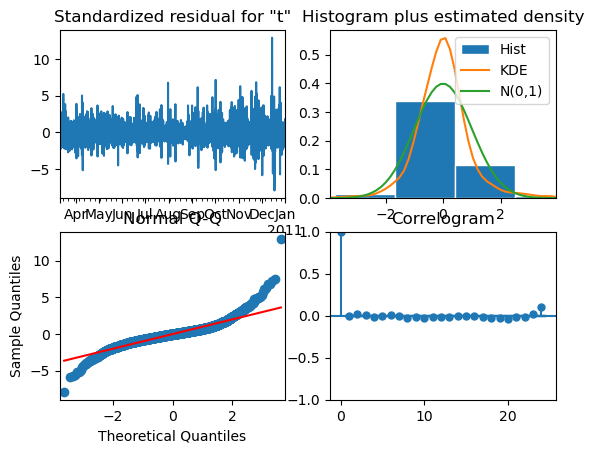

In [77]:
result_2_CO.plot_diagnostics(lags=24)
print(result_2_CO.summary())

                                     SARIMAX Results                                      
Dep. Variable:                     target_benzene   No. Observations:                 7111
Model:             SARIMAX(2, 0, 1)x(0, 1, 1, 24)   Log Likelihood              -14053.561
Date:                            Thu, 07 Dec 2023   AIC                          28119.122
Time:                                    20:12:41   BIC                          28160.338
Sample:                                03-10-2010   HQIC                         28133.313
                                     - 01-01-2011                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sensor_2       0.0255      0.000    235.091      0.000       0.025       0.026
ar.L1          0.8001      0.066   

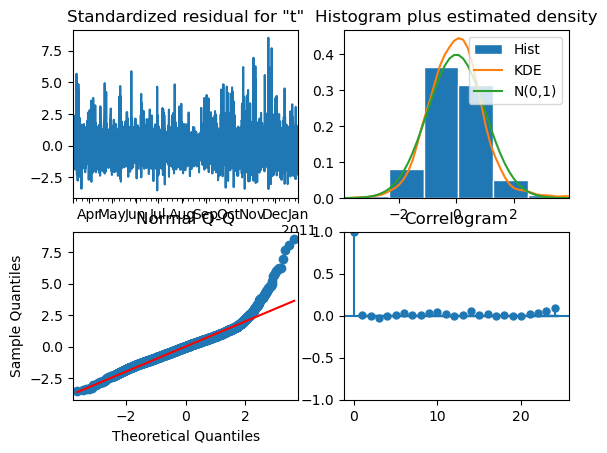

In [79]:
result_2_C6H6.plot_diagnostics(lags=24)
print(result_2_C6H6.summary())

                                      SARIMAX Results                                       
Dep. Variable:               target_nitrogen_oxides   No. Observations:                 7111
Model:             SARIMAX(2, 0, 2)x(1, 1, [1], 24)   Log Likelihood              -38878.584
Date:                              Thu, 07 Dec 2023   AIC                          77773.169
Time:                                      20:12:40   BIC                          77828.124
Sample:                                  03-10-2010   HQIC                         77792.090
                                       - 01-01-2011                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sensor_2       0.3212      0.002    129.908      0.000       0.316       0.326
ar.L1          1.73

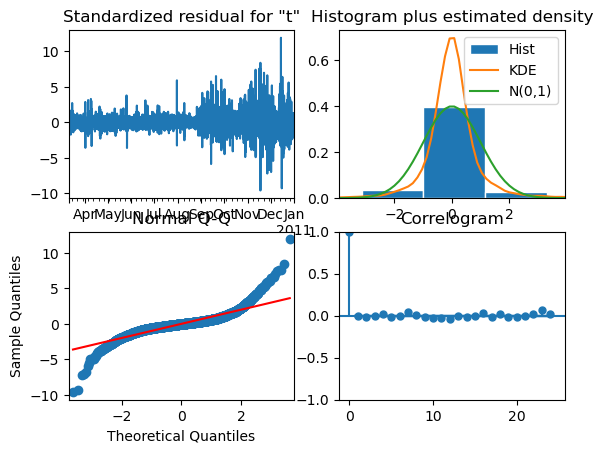

In [78]:
result_2_NOx.plot_diagnostics(lags=24)
print(result_2_NOx.summary())

##### 最終予想

In [80]:
test_x = test[['date_time', 'sensor_2']].set_index('date_time', inplace=False)

In [81]:
pred_2_CO = result_2_CO.get_prediction(start=pd.to_datetime('2011-01-01 00:00:00'),
                                    end=pd.to_datetime('2011-04-04 15:00:00'),
                                    exog=test_x, dynamic=True)

pred_2_C6H6 = result_2_C6H6.get_prediction(start=pd.to_datetime('2011-01-01 00:00:00'),
                                        end=pd.to_datetime('2011-04-04 15:00:00'),
                                        exog=test_x, dynamic=True)

pred_2_NOx = result_2_NOx.get_prediction(start=pd.to_datetime('2011-01-01 00:00:00'),
                                        end=pd.to_datetime('2011-04-04 15:00:00'),
                                        exog=test_x, dynamic=True)

pred_mean_2_CO = pred_2_CO.predicted_mean
pred_ci_2_CO = pred_2_CO.conf_int()
pred_mean_2_CO = pred_mean_2_CO.drop(pred_mean_2_CO.index[2247])
pred_ci_2_CO = pred_ci_2_CO.drop(pred_ci_2_CO.index[2247])
pred_mean_2_CO_values = pred_mean_2_CO.values.clip(min=0)

pred_mean_2_C6H6 = pred_2_C6H6.predicted_mean
pred_ci_2_C6H6 = pred_2_C6H6.conf_int()
pred_mean_2_C6H6 = pred_mean_2_C6H6.drop(pred_mean_2_C6H6.index[2247])
pred_ci_2_C6H6 = pred_ci_2_C6H6.drop(pred_ci_2_C6H6.index[2247])
pred_mean_2_C6H6_values = pred_mean_2_C6H6.values.clip(min=0)

pred_mean_2_NOx = pred_2_NOx.predicted_mean
pred_ci_2_NOx = pred_2_NOx.conf_int()
pred_mean_2_NOx = pred_mean_2_NOx.drop(pred_mean_2_NOx.index[2247])
pred_ci_2_NOx = pred_ci_2_NOx.drop(pred_ci_2_NOx.index[2247])
pred_mean_2_NOx_values = pred_mean_2_NOx.values.clip(min=0)

##### 結果

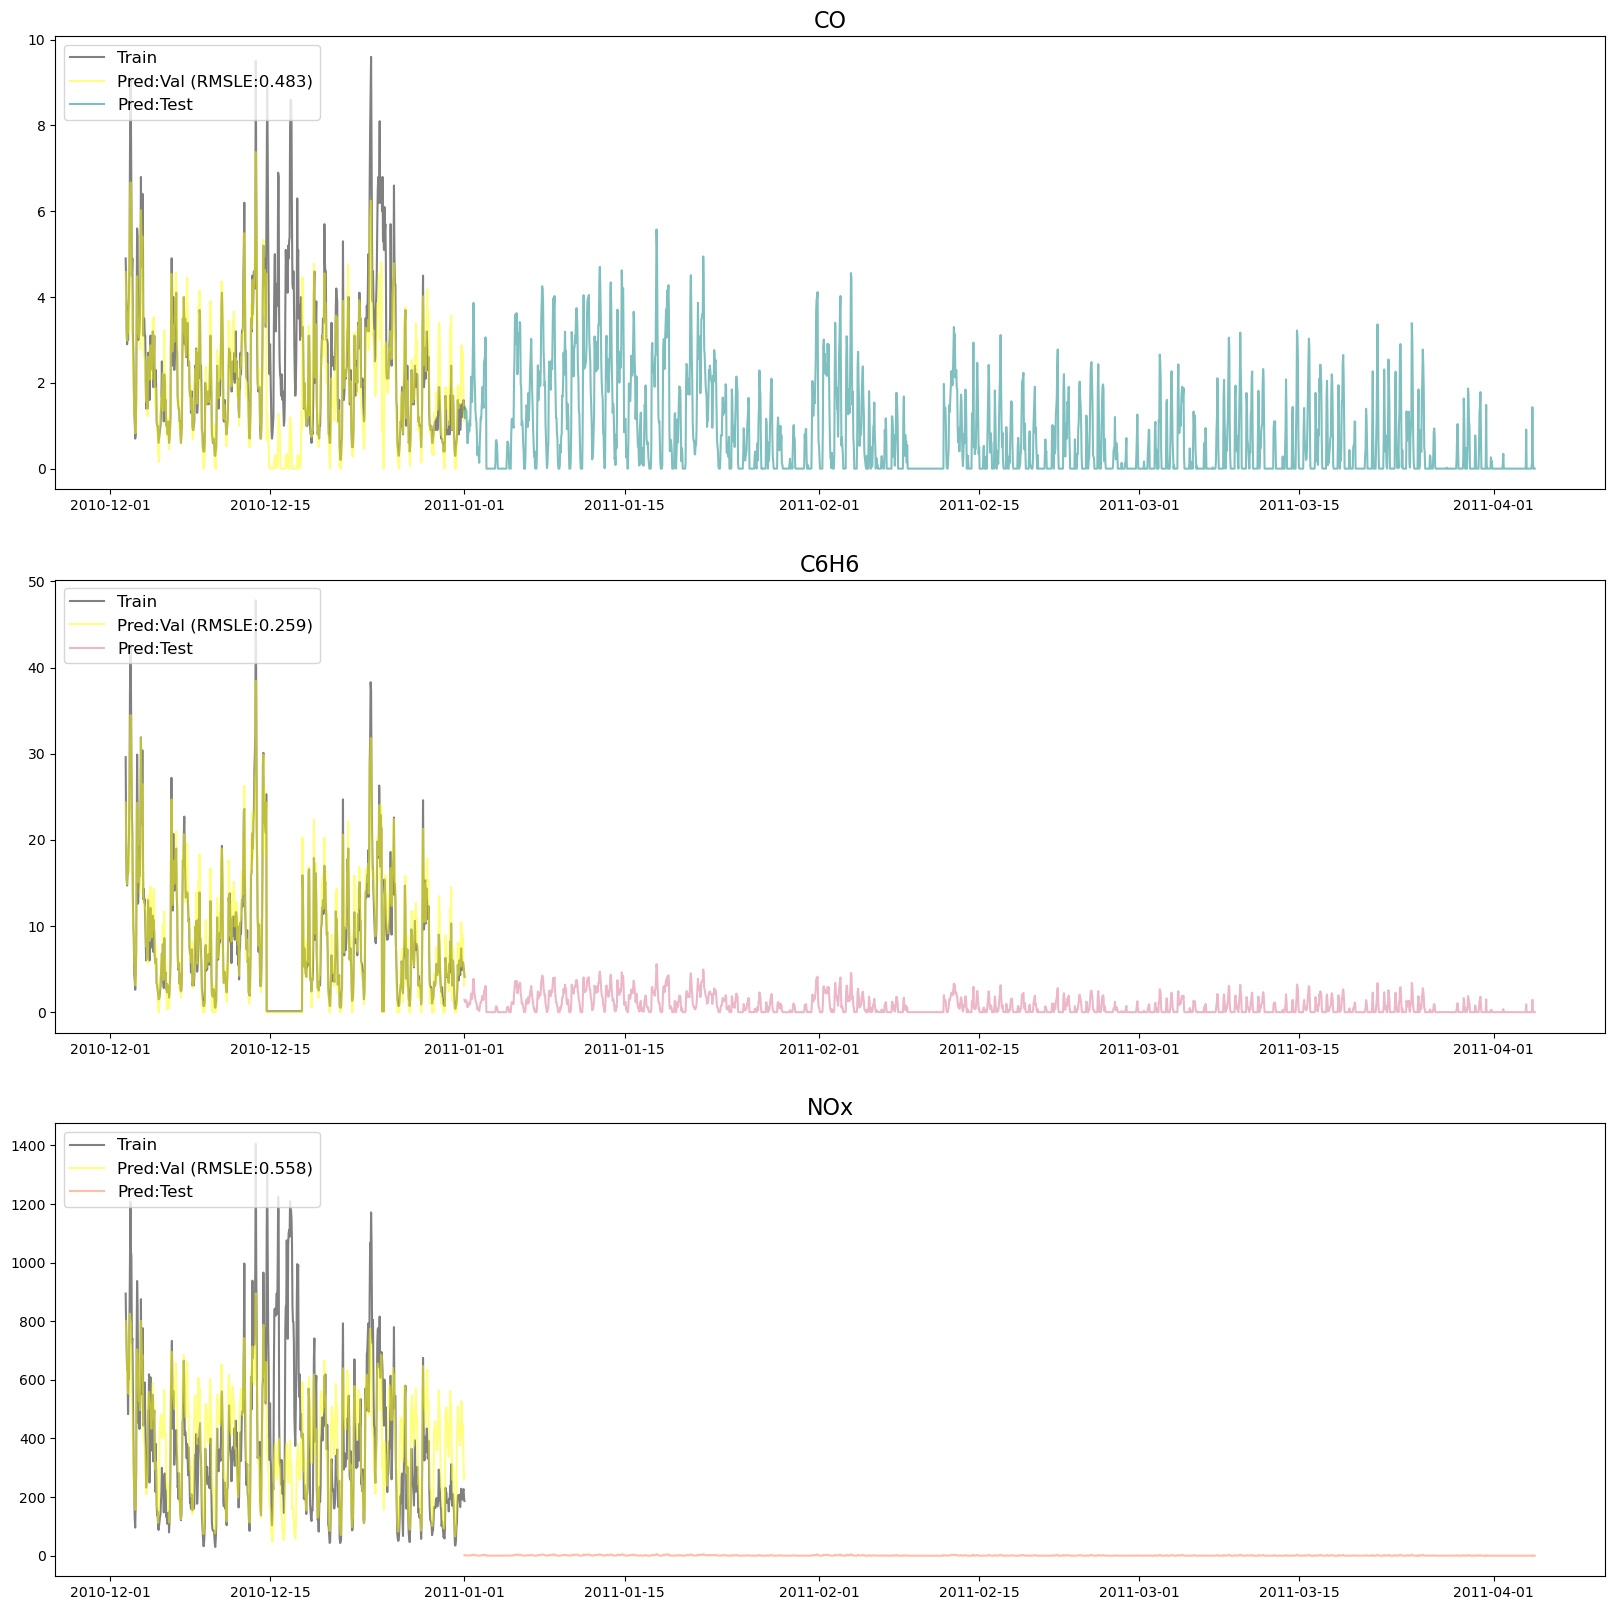

In [85]:
fig, axs = plt.subplots(figsize=(20, 20), ncols=1, nrows=3)


for i in range(3):

    name1 = f'val_{target_names[i]}'
    name2 = f'pred_mean_{target_names[i]}_values'
    name3 = f'rmsle_{target_names[i]}'
    name4 = f'pred_mean_2_{target_names[i]}_values'

    axs[i].plot(val_CO.index, globals()[name1].values, color='gray', label='Train')
    axs[i].plot(pred_mean_CO.index, globals()[name2], color='yellow', alpha=0.5, label=f'Pred:Val (RMSLE:{globals()[name3]:0.3f})')
    axs[i].plot(pred_mean_2_CO.index, pred_mean_2_CO_values, color=colors[i], alpha=0.5, label='Pred:Test')
    axs[i].set_title(target_names[i], fontsize=16)
    axs[i].legend(loc='upper left', fontsize=12)

plt.show()


In [83]:
submit_df = pd.read_csv('sample_submission.csv')
submit_df['target_carbon_monoxide'] = pred_mean_2_CO_values
submit_df['target_benzene'] = pred_mean_2_C6H6_values
submit_df['target_nitrogen_oxides'] = pred_mean_2_NOx_values

submit_df.to_csv('submission_sarimax.csv', index=False)

### Kaggle score
- Private: 0.39637
- Public: 0.4659